In [2]:
from tensorflow.keras.datasets import mnist

#load MNIST dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
print(x_train.shape)

(60000, 28, 28)


In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
from matplotlib import pyplot as plt

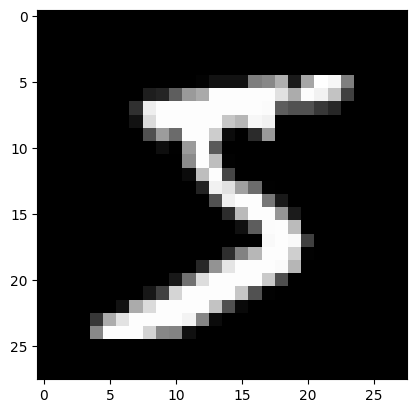

In [7]:
plt.imshow(x_train[0])
plt.gray()
plt.show()

In [8]:
y_train[0]

5

In [9]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [10]:
# set image information
channels=1
height=28
width=28

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [13]:
#Keras format for img (no_of_img,height,width,channel)

train_data=x_train.reshape(x_train.shape[0],height,width,channels)

In [14]:
train_data.shape

(60000, 28, 28, 1)

In [15]:
test_data=x_test.reshape(x_test.shape[0],height,width,channels)
test_data.shape

(10000, 28, 28, 1)

In [16]:
# scale the data
train_data=train_data/255
test_data=test_data/255

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
# Encoding of data
train_target=to_categorical(y_train)
test_target=to_categorical(y_test)

In [19]:
train_target

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [20]:
test_target.shape[1]

10

In [21]:
#number of classes
number_of_classes=test_target.shape[1]

In [22]:
# CNN model building

model=Sequential()

model.add(Conv2D(filters=64,kernel_size=(5,5),input_shape=(height,width,channels),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(number_of_classes,activation='softmax'))

In [23]:
5*5*64+64

1664

In [24]:
(32*5*5)*64+32

51232

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          51232     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)               6

In [26]:
#compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
pip install livelossplot


In [28]:
from livelossplot import PlotLossesKerasTF


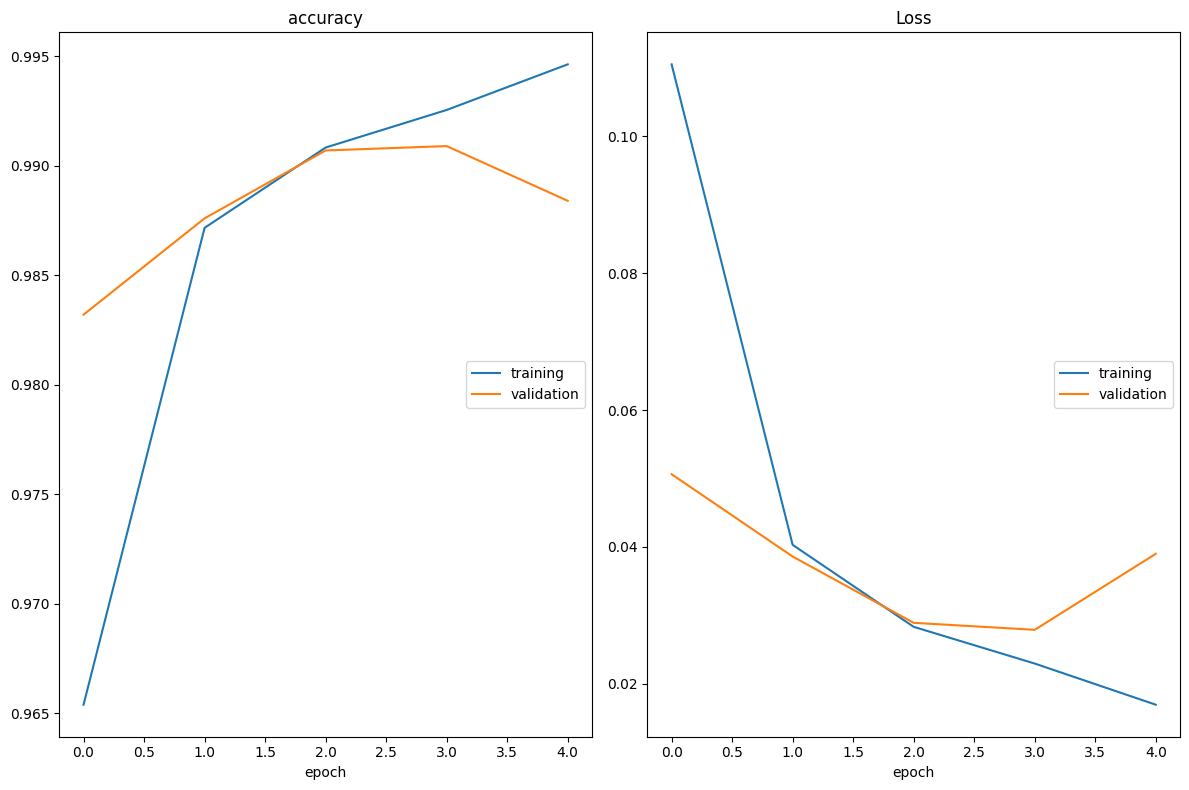

accuracy
	training         	 (min:    0.965, max:    0.995, cur:    0.995)
	validation       	 (min:    0.983, max:    0.991, cur:    0.988)
Loss
	training         	 (min:    0.017, max:    0.110, cur:    0.017)
	validation       	 (min:    0.028, max:    0.051, cur:    0.039)
3750/3750 [==============================] - 16s 4ms/step - loss: 0.0170 - accuracy: 0.9946 - val_loss: 0.0390 - val_accuracy: 0.9884


In [29]:
# train the model
res=model.fit(train_data,train_target,batch_size=16,epochs=5,validation_data=(test_data,test_target),callbacks=[PlotLossesKerasTF()])

In [30]:
# Save the Model
model.save("digitModel.h5")

In [31]:
from tensorflow.keras.models import load_model

In [32]:
# Load the model
network=load_model('digitModel.h5')

In [33]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          51232     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)               6